In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow_hub as hub
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2025-10-23 13:43:02.197974: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761226982.436371      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761226982.506570      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
from glob import glob
import os

In [3]:
df_report=pd.read_csv("/kaggle/input/chest-xrays-indiana-university/indiana_reports.csv")
df_pro=pd.read_csv("/kaggle/input/chest-xrays-indiana-university/indiana_projections.csv")

In [4]:
df_report.head(10)

,uid,MeSH,Problems,image,indication,comparison,findings,impression
0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
1,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
2,3,normal,normal,Xray Chest PA and Lateral,"rib pain after a XXXX, XXXX XXXX steps this XX...",NaN,NaN,"No displaced rib fractures, pneumothorax, or p..."
3,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",XXXX-year-old XXXX with XXXX.,None available,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...
4,5,Osteophyte/thoracic vertebrae/multiple/small;T...,Osteophyte;Thickening;Lung,Xray Chest PA and Lateral,Chest and nasal congestion.,NaN,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.
5,6,normal,normal,"PA and Lateral Chest. XXXX, XXXX at XXXX",Evaluate for infection,"XXXX, XXXX",Heart size and mediastinal contour are within ...,No acute cardiopulmonary findings.
6,7,Pulmonary Atelectasis/base;Spondylosis/thoraci...,Pulmonary Atelectasis;Spondylosis;Arthritis,Xray Chest PA and Lateral,Preop lumbar surgery,"XXXX, XXXX",The cardiac contours are normal. XXXX basilar ...,Basilar atelectasis. No confluent lobar consol...
7,8,normal,normal,Xray Chest PA and Lateral,XXXX-year-old with XXXX on XXXX. Dyspnea. Hist...,Two views of the chest dated XXXX.,"The heart, pulmonary XXXX and mediastinum are ...",No acute cardiopulmonary disease.
8,9,Calcified Granuloma/lung/upper lobe/right;Dens...,Calcified Granuloma;Density,Xray Chest PA and Lateral,Chest pain today. History of stent placement 7...,"CT XXXX image XXXX, CT abdomen which included ...",The XXXX examination consists of frontal and l...,Increased size of density in the left cardioph...
9,10,Calcified Granuloma/lung/upper lobe/right,Calcified Granuloma,PA and lateral chest x-XXXX XXXX.,"XXXX-year-old male, chest pain.",Chest radiographs XXXX.,The cardiomediastinal silhouette is within nor...,No acute cardiopulmonary process.


In [5]:
df_pro.head(10)

,uid,filename,projection
0,1,1_IM-0001-4001.dcm.png,Frontal
1,1,1_IM-0001-3001.dcm.png,Lateral
2,2,2_IM-0652-1001.dcm.png,Frontal
3,2,2_IM-0652-2001.dcm.png,Lateral
4,3,3_IM-1384-1001.dcm.png,Frontal
5,3,3_IM-1384-2001.dcm.png,Lateral
6,4,4_IM-2050-1001.dcm.png,Frontal
7,4,4_IM-2050-2001.dcm.png,Lateral
8,5,5_IM-2117-1003002.dcm.png,Frontal
9,5,5_IM-2117-1004003.dcm.png,Lateral


In [6]:
print(df_report.shape)
print(df_pro.shape)

(3851, 8)
(7466, 3)


In [7]:
df_pro = df_pro[df_pro["projection"] == "Frontal"]   

In [8]:
df_report = df_pro[df_pro['uid'].isin(df_report['uid'])]

In [9]:
print("New report shape ", df_report.shape)
print("New pro shape ", df_pro.shape)

New report shape  (3818, 3)
New pro shape  (3818, 3)


In [10]:
df_pro.head()

,uid,filename,projection
0,1,1_IM-0001-4001.dcm.png,Frontal
2,2,2_IM-0652-1001.dcm.png,Frontal
4,3,3_IM-1384-1001.dcm.png,Frontal
6,4,4_IM-2050-1001.dcm.png,Frontal
8,5,5_IM-2117-1003002.dcm.png,Frontal


In [11]:
image_path = "/kaggle/input/chest-xrays-indiana-university/images/images_normalized/"
images = glob(image_path + "*.png") 

#This code will collect all .png image file paths from the images_normalized directory in your Kaggle dataset and store them in the list images.

In [12]:
len(images)

7470

In [13]:
mean = np.array([0.485, 0.456, 0.406])
sd = np.array([0.229, 0.224, 0.225])

resized_images = []

for img_name in df_pro["filename"]:
    img_path = os.path.join(image_path, img_name)

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    img = img / 255.0
    img = (img - mean) / sd
    resized_images.append(img)

resized_images = np.array(resized_images)

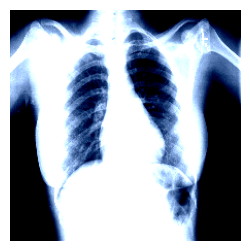

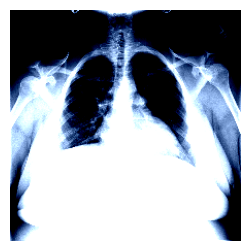

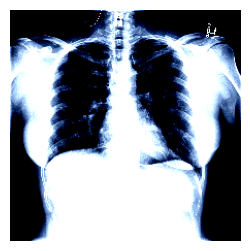

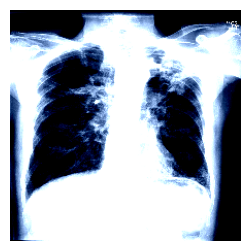

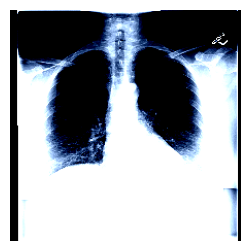

In [14]:
for i in range(5):  # show first 5 images
    plt.figure(figsize=(3,3))
    plt.imshow(resized_images[i])
    plt.axis('off')
    plt.show()

In [15]:
base_model = keras.applications.ConvNeXtTiny(
    include_top=False,
    include_preprocessing=True,
    weights="imagenet",
    input_shape=(224, 224, 3)
)

2025-10-23 13:47:39.849065: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


111650432/111650432 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [16]:
base_model.summary()

Model: "convnext_tiny"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_pres… │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stem  │ (None, 56, 56,    │      4,896 │ convnext_tiny_pr… │
│ (Sequential)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 56, 56,    │      4,800 │ convnext_tiny_st… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 56, 56,    │        192 │ convnext_tiny_st… │
│ (LayerNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 56, 56,    │     37,248 │ convnext_tiny_st… │
│ (Dense)             │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 56, 56,    │          0 │ convnext_tiny_st… │
│ (Activation)        │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 56, 56,    │     36,960 │ convnext_tiny_st… │
│ (Dense)             │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 56, 56,    │         96 │ convnext_tiny_st… │
│ (LayerScale)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 56, 56,    │          0 │ convnext_tiny_st… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 56, 56,    │          0 │ convnext_tiny_st… │
│                     │ 96)               │            │ convnext_tiny_st… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 56, 56,    │      4,800 │ add[0][0]         │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 56, 56,    │        192 │ convnext_tiny_st… │
│ (LayerNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 56, 56,    │     37,248 │ convnext_tiny_st… │
│ (Dense)             │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 56, 56,    │          0 │ convnext_tiny_st… │
│ (Activation)        │ 384)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 56, 56,    │     36,960 │ convnext_tiny_st… │
│ (Dense)             │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_tiny_stag… │ (None, 56, 56,    │         96 │ convnext_tiny_st

 Total params: 27,820,128 (106.13 MB)

 Trainable params: 27,820,128 (106.13 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
features = base_model.predict(resized_images)

I0000 00:00:1761227273.111308      53 service.cc:148] XLA service 0x77fba8005b60 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1761227273.112063      53 service.cc:156]   StreamExecutor device (0): Host, Default Version
I0000 00:00:1761227273.205831      53 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


120/120 ━━━━━━━━━━━━━━━━━━━━ 2876s 24s/step


In [18]:
np.save("convnext_features.npy", features)

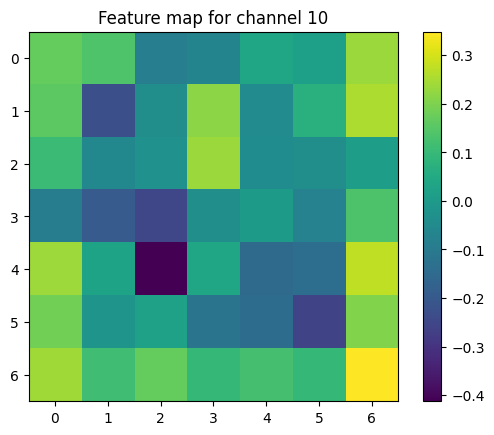

In [19]:
features = np.load("convnext_features.npy")
plt.imshow(features[0, :, :, 10], cmap='viridis')
plt.title("Feature map for channel 10")
plt.colorbar()
plt.show()